In [1]:
import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta

## Similarity between two time series

If the joy series of the investor is similar to the joy series of the entrepreneur around peak joy, one might conclude emotional contagion takes place.

In [13]:
contagion_measures = pd.DataFrame(columns = ['pitch', 'investorid', 'dtw_long', 'dtw_short'])

contagion_measures['pitch'] = ['Little Sister', 'FLIPR', 'Bubble Pop', 'RecognEyes', 'HOTIDY', 'FitPoint', 'SOLON', 'tAIste', 
                               'Choos3 Wisely', 'SmArt', 'StudentFood', 'wAIste', 'Chattern', 'FindIT',
                              'Ar-T-Ficial', 'Recipe-Me', 'Peech', 'HoodFood', 'LockUp', 'Ziggurat', 'PREA',
                               'Young Boosters', 'Whitebox', 'Soccer Academy'] * 3
contagion_measures.iloc[:30]

,pitch,investorid,dtw_long,dtw_short
0,Little Sister,NaN,NaN,NaN
1,FLIPR,NaN,NaN,NaN
2,Bubble Pop,NaN,NaN,NaN
3,RecognEyes,NaN,NaN,NaN
4,HOTIDY,NaN,NaN,NaN
5,FitPoint,NaN,NaN,NaN
6,SOLON,NaN,NaN,NaN
7,tAIste,NaN,NaN,NaN
8,Choos3 Wisely,NaN,NaN,NaN
9,SmArt,NaN,NaN,NaN


In [14]:
def clean_data(data_par):
    
    data_par['Video Time'] = pd.to_datetime(data_par['Video Time'])

    
    # Replace FaceReader values with NaNs
    data_par = data_par.replace('FIT_FAILED', np.nan)
    data_par = data_par.replace('FIND_FAILED', np.nan)
    
    # Make emotion columns numeric
    data_par['Happy'] = pd.to_numeric(data_par['Happy'])
    data_par['Neutral'] = pd.to_numeric(data_par['Neutral'])
    data_par['Sad'] = pd.to_numeric(data_par['Sad'])
    data_par['Angry'] = pd.to_numeric(data_par['Angry'])
    data_par['Surprised'] = pd.to_numeric(data_par['Surprised'])
    data_par['Scared'] = pd.to_numeric(data_par['Scared'])
    data_par['Disgusted'] = pd.to_numeric(data_par['Disgusted'])
    
    return data_par

In [19]:
def joy_timeseries(data_par, data_inv1, data_inv2, data_inv3):
    
    
    # Find index and time of peak joy
    index_joy = data_par['Happy'].argmax()
    joy_timestamp = data_par.loc[index_joy, 'Video Time']
    
    time_deltas_before = [5, 2.5 0.5]
    time_deltas_after = [5, 2.5, 2.5]
    
    output_data = {}

    
    for i in range(0,3):
        
        time_delt_min = time_deltas_before[i]
        time_delt_max = time_deltas_after[i]
        
        joy_min_time = joy_timestamp - timedelta(seconds=time_delt_min)
        joy_max_time = joy_timestamp + timedelta(seconds=time_delt_max)

        timestamp_mask = joy_timestamp

        student_indexes = []
        inv1_indexes = []
        inv2_indexes = []
        inv3_indexes = []

        for index, row in data_par.iterrows():
            if joy_min_time <= row['Video Time'] <= joy_max_time:
                student_indexes.append(index)
            elif row['Video Time'] > joy_max_time:
                break
            else:
                continue
               
        for index, row in data_inv1.iterrows():
            if joy_min_time <= row['Video Time'] <= joy_max_time:
                inv1_indexes.append(index)
            elif row['Video Time'] > joy_max_time:
                break
            else:
                continue

        for index, row in data_inv2.iterrows():
            if joy_min_time <= row['Video Time'] <= joy_max_time:
                inv2_indexes.append(index)
            elif row['Video Time'] > joy_max_time:
                break
            else:
                continue

        for index, row in data_inv3.iterrows():
            if joy_min_time <= row['Video Time'] <= joy_max_time:
                inv3_indexes.append(index)
            elif row['Video Time'] > joy_max_time:
                break
            else:
                continue

        sel_data_par = data_par.loc[data_par.index[student_indexes]]
        sel_data_inv1 = data_inv1.loc[data_inv1.index[inv1_indexes]]
        sel_data_inv2 = data_inv2.loc[data_inv2.index[inv2_indexes]]
        sel_data_inv3 = data_inv3.loc[data_inv3.index[inv3_indexes]]
        
        curr_data = [sel_data_par, sel_data_inv1, sel_data_inv2, sel_data_inv3]
        
        output_data[time_delt_min] = curr_data

    return output_data

In [20]:
# Loop over every FaceReader data file and extract relevant information
filenames = os.listdir('C:\\Users\\s160705\\Documents\\Thesis\\Analysis\\Contagion Data')
pitch_data = {}

pitches = ['Little Sister', 'FLIPR', 'Bubble Pop', 'RecognEyes', 'HOTIDY', 'FitPoint', 'SOLON', 'tAIste', 
                               'Choos3 Wisely', 'SmArt', 'StudentFood', 'wAIste', 'Schwifty Shopping', 'Chattern', 'FindIT',
                              'Ar-T-Ficial', 'Recipe-Me', 'Salix', 'Peech', 'prAltor', 'HoodFood', 'LockUp', 'Ziggurat', 'PREA',
                               'Young Boosters', 'Whitebox', 'Soccer Academy']

for filename in filenames:
    
    if 'Investor' not in filename:  # If reading a student FR file
        
        for pitch in pitches: 
            if pitch in filename:
                pitch_name = pitch
            
                # Read student data
                data_par = pd.read_csv('C:\\Users\\s160705\\Documents\\Thesis\\Analysis\\Contagion Data\{}'.format(filename))
                data_par = clean_data(data_par)

                try:
                    # Read investor data
                    inv1_filename = [i for i in filenames if "{} Investor 1".format(pitch_name) in i]
                    data_inv1 = pd.read_csv('C:\\Users\\s160705\\Documents\\Thesis\\Analysis\\Contagion Data\{}'.format(inv1_filename[0]))
                    data_inv1 = clean_data(data_inv1)
                except:
                    continue  # If no investor1 data skip to next pitch
            
            
                inv2_filename = [i for i in filenames if "{} Investor 2".format(pitch_name) in i]
                data_inv2 = pd.read_csv('C:\\Users\\s160705\\Documents\\Thesis\\Analysis\\Contagion Data\{}'.format(inv2_filename[0]))
                data_inv2 = clean_data(data_inv2)

                inv3_filename = [i for i in filenames if "{} Investor 3".format(pitch_name) in i]
                data_inv3 = pd.read_csv('C:\\Users\\s160705\\Documents\\Thesis\\Analysis\\Contagion Data\{}'.format(inv3_filename[0]))
                data_inv3 = clean_data(data_inv3)

                
                joy_data = joy_timeseries(data_par, data_inv1, data_inv2, data_inv3)
                
                pitch_data[pitch] = joy_data
                       

C:\Users\s160705\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\s160705\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\s160705\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = awai

In [32]:
pitch_data['Ar-T-Ficial'][7.5][3]

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,...,Action Unit 12 - Right - Lip Corner Puller,Action Unit 14 - Right - Dimpler,Action Unit 15 - Right - Lip Corner Depressor,Action Unit 20 - Right - Lip Stretcher,Action Unit 43 - Right - Eyes Closed,Heart Rate,Heart Rate Variability,Heart Rate Warnings,Stimulus,Event Marker
4972,2021-06-23 00:02:45.725,0.788673,0.011567,0.067793,0.035071,0.000578,0.000238,0.036104,-0.056225490,0.376947400,...,0.019925880,0.000000000,0.000000000,0.000000000,0.000000000,Unknown,Unknown,None,No Stimulus,No Event Marker
4973,2021-06-23 00:02:45.758,0.787453,0.011387,0.065556,0.034937,0.000598,0.000251,0.036210,-0.054169010,0.376887500,...,0.020260300,0.000000000,0.000000000,0.000000000,0.000000000,Unknown,Unknown,None,No Stimulus,No Event Marker
4974,2021-06-23 00:02:45.791,0.785613,0.011188,0.063654,0.034852,0.000617,0.000263,0.036434,-0.052466220,0.376858800,...,0.020439840,0.000000000,0.000000000,0.000000000,0.000000000,Unknown,Unknown,None,No Stimulus,No Event Marker
4975,2021-06-23 00:02:45.825,0.783326,0.010965,0.062028,0.034984,0.000639,0.000274,0.036723,-0.051063110,0.376858800,...,0.020957930,0.000000000,0.000000000,0.000000000,0.000000000,Unknown,Unknown,None,No Stimulus,No Event Marker
4976,2021-06-23 00:02:45.858,0.780939,0.010721,0.060680,0.035247,0.000664,0.000283,0.036935,-0.049959180,0.377774700,...,0.021259020,0.000000000,0.000000000,0.000000000,0.000000000,Unknown,Unknown,None,No Stimulus,No Event Marker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,2021-06-23 00:02:53.591,0.479275,0.001368,0.094355,0.033187,0.000273,0.000363,0.219151,-0.217783000,0.336861300,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,61,Unknown,None,No Stimulus,No Event Marker
5209,2021-06-23 00:02:53.624,0.477088,0.001296,0.094561,0.034493,0.000263,0.000365,0.217113,-0.215817600,0.336816100,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,61,Unknown,None,No Stimulus,No Event Marker
5210,2021-06-23 00:02:53.657,0.475356,0.001232,0.094052,0.036782,0.000254,0.000372,0.214864,-0.213632000,0.336763700,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,61,Unknown,None,No Stimulus,No Event Marker
5211,2021-06-23 00:02:53.691,0.474150,0.001176,0.092921,0.040693,0.000247,0.000383,0.211930,-0.210753400,0.336703300,...,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,61,Unknown,None,No Stimulus,No Event Marker


In [22]:
from scipy.stats.stats import pearsonr   
a = pitch_data['Little Sister'][5][0]['Happy']
b = pitch_data['Little Sister'][5][1]['Happy']   
c = pitch_data['Little Sister'][5][2]['Happy']
print(pearsonr(a,b))

ValueError: x and y must have the same length.

Pearson correlation does not work as the videos have a slightly different frame/sampling rate resulting in vectors with different lengths. -> Solution Dynamic Time Warping

## Dynamic Time Warping

In [23]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

#x = np.array([1, 2, 3, 3, 7])
#y = np.array([1, 2, 2, 2, 2, 2, 2, 4])

a = a.fillna(0)
b = b.fillna(0)
c = c.fillna(0)

distance_ab, path = fastdtw(a, b, dist=euclidean)
distance_ac, path = fastdtw(a, c, dist=euclidean)


print(distance_ab)
print(distance_ac)

7.427156437000001
7.3579201849999984


In [35]:
datasets = [5, 2.5 0.5]

for pitch in pitch_data:  # For each pitch in dataset
    
    print(pitch)
    
    for dataset in datasets:  # For each different joy timeline (long, short)
    
        student_joy_series = pitch_data[pitch][dataset][0]['Happy'].interpolate().values
        inv1_joy_series = pitch_data[pitch][dataset][1]['Happy'].interpolate().values
        inv2_joy_series = pitch_data[pitch][dataset][2]['Happy'].interpolate().values
        inv3_joy_series = pitch_data[pitch][dataset][3]['Happy'].interpolate().values

        distance_inv1, path = fastdtw(student_joy_series, inv1_joy_series)
        distance_inv2, path = fastdtw(student_joy_series, inv2_joy_series)
        distance_inv3, path = fastdtw(student_joy_series, inv3_joy_series)
        
        distances = [distance_inv1, distance_inv2, distance_inv3]
    
        indexes = contagion_measures.index[contagion_measures['pitch'] == pitch].tolist()
        counter = 0
        
        contagion_measures.at[indexes[0], 'investorid'] = 1  # Assign investor ids to rows
        contagion_measures.at[indexes[1], 'investorid'] = 2
        contagion_measures.at[indexes[2], 'investorid'] = 3
        
        while counter < 3:  # For each investor 
            
            investor_index = indexes[counter]
            investor_id = counter + 1
            
            distance_data = distances[counter]
            
            if dataset == 7.5:
                contagion_measures.at[investor_index, 'dtw_long'] = distance_data
            else:
                contagion_measures.at[investor_index, 'dtw_short'] = distance_data               
                
            counter +=1

Peech
241
80
91
30
Ar-T-Ficial
241
200


IndexError: tuple index out of range

In [120]:
contagion_measures.head(10)

,pitch,investorid,dtw_long,dtw_short,dtw_tail
0,Little Sister,1,10.9862,10.914,9.84596
1,FLIPR,1,11.0885,9.48013,9.31723
2,Bubble Pop,1,20.1854,17.5874,20.1457
3,RecognEyes,1,4.97717,3.84977,4.22547
4,HOTIDY,1,15.3208,11.9402,13.2069
5,FitPoint,1,48.1978,35.3925,48.1978
6,SOLON,1,45.8525,43.5833,44.5963
7,tAIste,1,48.7054,49.7895,46.1738
8,Choos3 Wisely,1,2.11254,2.23065,0.856468
9,SmArt,1,50.4775,34.7659,16.5028


In [121]:
contagion_measures['dtw_long'].mean()

26.73222066752778

In [122]:
contagion_measures['dtw_long'].std()

24.873429194360934

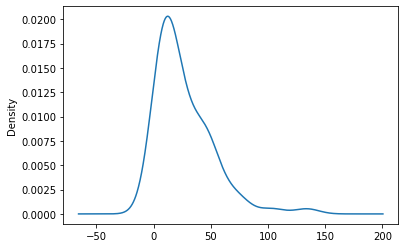

In [123]:
contagion_measures['dtw_long'].plot.density()

In [124]:
contagion_measures['dtw_tail'].min()

0.8564681980000004

In [125]:
contagion_measures.to_csv('contagion_measures_v1.csv', index=False)

## Merge Contagion with Peak Joy

In [126]:
contagion_measures = pd.read_csv("contagion_measures_v1.csv")
regression_data = pd.read_csv("regression_data_w_investor.csv")

In [127]:
contagion_regression = pd.merge(contagion_measures, regression_data, on=['pitch', 'investorid'], how='right')
contagion_regression.iloc[50:]

,pitch,investorid,dtw_long,dtw_short,dtw_tail,Peak_Joy,Peak_Joy_Duration,ranking,probinv,probsuc,...,Average_Negative_Emotions,EE1_1_inv,EE1_2_inv,EE1_3_inv,EE3_inv,IT1A_inv,IE1_inv,IE2_inv,D1_inv,D2_inv
50,Bubble Pop,3,20.262903,17.629348,20.204882,0.514820,0.200,6,0,10,...,0.042640,17.0,16.0,16.0,6.0,3.0,12.0,6.0,40.0,1.0
51,RecognEyes,3,5.055540,3.868538,4.287511,0.109112,0.200,3,50,60,...,0.093827,17.0,16.0,16.0,6.0,3.0,12.0,6.0,40.0,1.0
52,HOTIDY,3,13.907951,11.493189,12.412475,0.331371,0.200,2,60,50,...,0.096358,17.0,16.0,16.0,6.0,3.0,12.0,6.0,40.0,1.0
53,FitPoint,3,47.177477,34.746937,47.177477,0.678607,0.300,7,20,10,...,0.111124,17.0,16.0,16.0,6.0,3.0,12.0,6.0,40.0,1.0
54,SOLON,3,45.730061,43.745701,44.686450,0.492315,0.366,5,20,20,...,0.075667,17.0,16.0,16.0,6.0,3.0,12.0,6.0,40.0,1.0
55,tAIste,3,50.911097,50.654232,48.755729,0.796148,0.500,8,10,10,...,0.032419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Choos3 Wisely,3,20.453505,8.841960,9.406584,0.021580,0.067,6,50,40,...,0.029726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,SmArt,3,51.713723,35.657273,16.703148,0.600791,0.200,4,10,10,...,0.073474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,StudentFood,3,28.808417,29.288431,28.593163,0.268151,0.200,7,5,10,...,0.097340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,wAIste,3,43.245966,10.064152,55.069621,0.585253,0.266,5,30,10,...,0.050635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
contagion_regression.to_csv('contagion_regression_data.csv', index = False)

## Binary Contagion

In [50]:
contagion_binary = pd.DataFrame(columns = ['pitch', 'investorid', 'contagion_binary_loose', 'contagion_binary_strict'])

contagion_binary['pitch'] = ['Little Sister', 'FLIPR', 'Bubble Pop', 'RecognEyes', 'HOTIDY', 'FitPoint', 'SOLON', 'tAIste', 
                               'Choos3 Wisely', 'SmArt', 'StudentFood', 'wAIste', 'Chattern', 'FindIT',
                              'Ar-T-Ficial', 'Recipe-Me', 'Peech', 'HoodFood', 'LockUp', 'Ziggurat', 'PREA',
                               'Young Boosters', 'Whitebox', 'Soccer Academy'] * 3
contagion_binary.iloc[:30]

,pitch,investorid,contagion_binary_loose,contagion_binary_strict
0,Little Sister,NaN,NaN,NaN
1,FLIPR,NaN,NaN,NaN
2,Bubble Pop,NaN,NaN,NaN
3,RecognEyes,NaN,NaN,NaN
4,HOTIDY,NaN,NaN,NaN
5,FitPoint,NaN,NaN,NaN
6,SOLON,NaN,NaN,NaN
7,tAIste,NaN,NaN,NaN
8,Choos3 Wisely,NaN,NaN,NaN
9,SmArt,NaN,NaN,NaN


In [51]:
datasets = [7.5, 2.5]
filenames = os.listdir('C:\\Users\\s160705\\Documents\\Thesis\\Analysis\\Contagion Data')


for pitch in pitch_data:  # For each pitch in dataset
    for name in filenames:
        if pitch in name:
            pitch_name = pitch
        else:
            continue
        
        
    # Read investor data
    try:
        inv1_filename = [i for i in filenames if "{} Investor 1".format(pitch_name) in i]
        data_inv1 = pd.read_csv('C:\\Users\\s160705\\Documents\\Thesis\\Analysis\\Contagion Data\{}'.format(inv1_filename[0]))
        data_inv1 = clean_data(data_inv1)
    except:
        continue
        
    inv2_filename = [i for i in filenames if "{} Investor 2".format(pitch_name) in i]
    data_inv2 = pd.read_csv('C:\\Users\\s160705\\Documents\\Thesis\\Analysis\\Contagion Data\{}'.format(inv2_filename[0]))
    data_inv2 = clean_data(data_inv2)
        
    inv3_filename = [i for i in filenames if "{} Investor 3".format(pitch_name) in i]
    data_inv3 = pd.read_csv('C:\\Users\\s160705\\Documents\\Thesis\\Analysis\\Contagion Data\{}'.format(inv3_filename[0]))
    data_inv3 = clean_data(data_inv3)
    
    print(pitch)
        
    inv1_happy_mean = data_inv1['Happy'].interpolate().mean()
    inv2_happy_mean = data_inv2['Happy'].interpolate().mean()
    inv3_happy_mean = data_inv3['Happy'].interpolate().mean()
    
    means = [inv1_happy_mean, inv2_happy_mean, inv3_happy_mean]
        
    inv1_happy_std = data_inv1['Happy'].interpolate().std()
    inv2_happy_std = data_inv2['Happy'].interpolate().std()
    inv3_happy_std = data_inv3['Happy'].interpolate().std()
    
    stds = [inv1_happy_std, inv2_happy_std, inv3_happy_std]
    
    indexes = contagion_binary.index[contagion_binary['pitch'] == pitch].tolist()

    for dataset in datasets:  # For each different joy timeline (long, short, tail)
        for i in range(1,4):  # For each investor
            
            joy_series = pitch_data[pitch][dataset][i]['Happy'].interpolate()
            
            threshold_loose = means[i-1] + stds[i-1]  # Compute threshold from list with index 0 to 2 for 3 investors
            threshold_strict = means[i-1] + 2*stds[i-1]  # Compute threshold from list with index 0 to 2 for 3 investors
            
            contagion_bool_loose = any(joy_value >= threshold_loose for joy_value in joy_series)
            contagion_bool_strict = any(joy_value >= threshold_strict for joy_value in joy_series)
            
            index_pitch_inv = indexes[i-1]
            
            contagion_binary.at[index_pitch_inv, 'investorid'] = i
            contagion_binary.at[index_pitch_inv, 'contagion_binary_loose'] = contagion_bool_loose
            contagion_binary.at[index_pitch_inv, 'contagion_binary_strict'] = contagion_bool_strict

Peech
Ar-T-Ficial
HoodFood
LockUp
Bubble Pop
wAIste
FLIPR
StudentFood
FitPoint
Little Sister
tAIste
Chattern
HOTIDY
FindIT
SOLON
Choos3 Wisely
RecognEyes
SmArt
PREA
Recipe-Me
Soccer Academy
Whitebox
Young Boosters
Ziggurat


In [52]:
contagion_binary['contagion_binary_loose'].value_counts()

False    44
True     28
Name: contagion_binary_loose, dtype: int64

In [53]:
contagion_binary['contagion_binary_strict'].value_counts()

False    52
True     20
Name: contagion_binary_strict, dtype: int64

In [54]:
reg_data = pd.read_csv('contagion_regression_data.csv')

In [55]:
final_data = pd.merge(reg_data, contagion_binary, on =['pitch', 'investorid'], how='left')
final_data.iloc[:25]

,pitch,investorid,dtw_long,dtw_short,dtw_tail,Peak_Joy,Peak_Joy_Duration,ranking,probinv,probsuc,...,EE1_2_inv,EE1_3_inv,EE3_inv,IT1A_inv,IE1_inv,IE2_inv,D1_inv,D2_inv,contagion_binary_loose,contagion_binary_strict
0,Little Sister,1,10.986174,10.913953,9.845962,0.229620,0.233,2,50,60,...,16.0,16.0,20.0,3.0,5.0,20.0,39.0,1.0,False,False
1,FLIPR,1,11.088470,9.480133,9.317232,0.375191,0.040,4,40,50,...,16.0,16.0,20.0,3.0,5.0,20.0,39.0,1.0,False,False
2,Bubble Pop,1,20.185435,17.587408,20.145651,0.514820,0.200,7,15,25,...,16.0,16.0,20.0,3.0,5.0,20.0,39.0,1.0,False,False
3,RecognEyes,1,4.977165,3.849771,4.225465,0.109112,0.200,1,70,70,...,16.0,16.0,20.0,3.0,5.0,20.0,39.0,1.0,True,False
4,HOTIDY,1,15.320798,11.940194,13.206914,0.331371,0.200,5,30,50,...,16.0,16.0,20.0,3.0,5.0,20.0,39.0,1.0,False,False
5,FitPoint,1,48.197818,35.392470,48.197818,0.678607,0.300,3,55,50,...,16.0,16.0,20.0,3.0,5.0,20.0,39.0,1.0,False,False
6,SOLON,1,45.852505,43.583311,44.596288,0.492315,0.366,6,50,50,...,16.0,16.0,20.0,3.0,5.0,20.0,39.0,1.0,False,False
7,tAIste,1,48.705443,49.789538,46.173830,0.796148,0.500,6,30,40,...,17.0,17.0,10.0,3.0,200.0,7.0,67.0,1.0,False,False
8,Choos3 Wisely,1,2.112538,2.230652,0.856468,0.021580,0.067,8,20,10,...,17.0,17.0,10.0,3.0,200.0,7.0,67.0,1.0,False,False
9,SmArt,1,50.477511,34.765863,16.502776,0.600791,0.200,3,40,40,...,17.0,17.0,10.0,3.0,200.0,7.0,67.0,1.0,False,False


## Correlation table

In [65]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [74]:
data = pd.read_csv("final_contagion_data.csv")

In [75]:
data = data.replace({'EE1-1_1': 13.0, 'EE1-1_3': 13.0,}, 1)
data = data.replace({'EE1-1_1': 14.0, 'EE1-1_3': 14.0,}, 2)
data = data.replace({'EE1-1_1': 15.0, 'EE1-1_3': 15.0,}, 3)
data = data.replace({'EE1-1_1': 16.0, 'EE1-1_3': 16.0,}, 4)
data = data.replace({'EE1-1_1': 17.0, 'EE1-1_3': 17.0,}, 5)

data = data.replace({'contagion_binary_strict': False}, 0)
data = data.replace({'contagion_binary_strict': True}, 1)

data = data.replace({'D2_inv': 2.0}, 0)
data = data.replace({'D2': 2.0}, 0)

data = data.replace({'probinv': 0}, 1)
data = data.replace({'probsuc': 0}, 1)


data['probinv'] = np.log(data['probinv'])
data['probsuc'] = np.log(data['probsuc'])

In [84]:
data.tail(15)

,pitch,investorid,dtw_long,dtw_short,dtw_tail,Peak_Joy,Peak_Joy_Duration,ranking,probinv,probsuc,...,EE1_2_inv,EE1_3_inv,EE3_inv,IT1A_inv,IE1_inv,IE2_inv,D1_inv,D2_inv,contagion_binary_loose,contagion_binary_strict
60,Chattern,3,15.724813,13.365151,13.002347,0.712856,0.266,1,3.912023,3.912023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0
61,FindIT,3,20.899650,8.805726,33.144414,0.794228,0.233,2,3.401197,2.995732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0
62,Ar-T-Ficial,3,12.166496,10.418421,11.971303,0.243507,0.200,3,2.302585,2.995732,...,16.0,16.0,NaN,2.0,NaN,30.0,59.0,1.0,False,0.0
63,Recipe-Me,3,12.939822,10.254927,12.939822,0.989771,0.233,5,2.302585,2.995732,...,16.0,16.0,NaN,2.0,NaN,30.0,59.0,1.0,True,1.0
64,Peech,3,123.201358,53.494236,78.361583,0.889778,0.500,4,1.609438,1.609438,...,16.0,16.0,NaN,2.0,NaN,30.0,59.0,1.0,False,0.0
65,HoodFood,3,36.590401,20.782029,28.566396,0.557620,0.166,6,1.609438,1.609438,...,16.0,16.0,NaN,2.0,NaN,30.0,59.0,1.0,False,0.0
66,LockUp,3,16.579307,16.299737,16.579307,0.612556,0.160,7,2.302585,2.995732,...,16.0,16.0,NaN,2.0,NaN,30.0,59.0,1.0,False,0.0
67,Ziggurat,3,37.924269,39.099333,33.334047,0.777705,0.240,3,3.688879,4.094345,...,16.0,14.0,0.0,2.0,12.0,7.0,31.0,1.0,True,1.0
68,PREA,3,46.840997,34.193290,38.167359,0.759972,0.240,1,4.382027,4.382027,...,16.0,14.0,0.0,2.0,12.0,7.0,31.0,1.0,True,0.0
69,Young Boosters,3,18.324116,16.645744,15.327517,0.448028,0.200,5,2.302585,2.302585,...,16.0,14.0,0.0,2.0,12.0,7.0,31.0,1.0,False,0.0


In [85]:
data.columns

Index(['pitch', 'investorid', 'dtw_long', 'dtw_short', 'dtw_tail', 'Peak_Joy',
       'Peak_Joy_Duration', 'ranking', 'probinv', 'probsuc', 'quality',
       'confbusiness', 'risk4', 'ATV1_1', 'ATV1_2', 'ATV1_3', 'EE1-3_1',
       'EE1-3_2', 'EE1-3_3', 'D1', 'D2', 'D4', 'Average_Joy',
       'First_Second_Joy', 'Last_Second_Joy', 'Joy Trajectory',
       'Average_Negative_Emotions', 'EE1_1_inv', 'EE1_2_inv', 'EE1_3_inv',
       'EE3_inv', 'IT1A_inv', 'IE1_inv', 'IE2_inv', 'D1_inv', 'D2_inv',
       'contagion_binary_loose', 'contagion_binary_strict'],
      dtype='object')

In [86]:
data[['probinv', 'probsuc', 'Peak_Joy', 'Peak_Joy_Duration', 'First_Second_Joy', 'Last_Second_Joy', 'Average_Joy', "Average_Negative_Emotions", "EE1-3_1", 'EE1-3_3', "D1", "D2", "D1_inv", "D2_inv", "IE1_inv", "EE1_1_inv", 'contagion_binary_strict']].corr()

,probinv,probsuc,Peak_Joy,Peak_Joy_Duration,First_Second_Joy,Last_Second_Joy,Average_Joy,Average_Negative_Emotions,EE1-3_1,EE1-3_3,D1,D2,D1_inv,D2_inv,IE1_inv,EE1_1_inv,contagion_binary_strict
probinv,1.000000,0.827405,-0.258069,-0.058534,-0.235116,0.022327,-0.081088,0.243075,0.117860,0.048449,0.107835,0.139956,-0.030092,0.186365,-0.149779,-0.000468,-0.054718
probsuc,0.827405,1.000000,-0.267263,-0.133496,-0.276126,0.050828,-0.280085,0.166422,0.061462,0.146019,0.200315,0.020994,-0.121800,0.158740,-0.164830,-0.055157,-0.020480
Peak_Joy,-0.258069,-0.267263,1.000000,0.621543,0.490422,0.449969,0.456704,-0.181861,0.234414,0.279525,0.127703,0.424782,0.148377,-0.086747,0.151148,0.019470,0.389209
Peak_Joy_Duration,-0.058534,-0.133496,0.621543,1.000000,0.082249,0.063054,0.432699,-0.021472,-0.050202,0.062637,-0.143327,0.149677,0.058391,-0.015734,0.145229,0.073423,-0.023245
First_Second_Joy,-0.235116,-0.276126,0.490422,0.082249,1.000000,-0.041727,0.268821,-0.099726,0.188663,0.004350,0.379997,0.320573,0.082561,-0.177088,-0.158807,-0.009579,0.376501
Last_Second_Joy,0.022327,0.050828,0.449969,0.063054,-0.041727,1.000000,0.355315,-0.115606,0.152204,0.051583,-0.054321,0.508834,0.161361,0.113194,0.465597,-0.015272,0.338231
Average_Joy,-0.081088,-0.280085,0.456704,0.432699,0.268821,0.355315,1.000000,0.102749,0.029947,-0.232330,-0.216696,0.686636,0.145091,-0.001203,0.324262,0.075428,0.222990
Average_Negative_Emotions,0.243075,0.166422,-0.181861,-0.021472,-0.099726,-0.115606,0.102749,1.000000,0.388311,-0.015662,0.044519,0.077877,-0.287836,0.252959,-0.115715,-0.005889,-0.080492
EE1-3_1,0.117860,0.061462,0.234414,-0.050202,0.188663,0.152204,0.029947,0.388311,1.000000,0.578125,0.489910,0.375000,-0.154913,0.184339,-0.025244,-0.058955,0.206904
EE1-3_3,0.048449,0.146019,0.279525,0.062637,0.004350,0.051583,-0.232330,-0.015662,0.578125,1.000000,0.573321,0.093750,-0.174087,0.151820,-0.102830,-0.044237,0.240192


In [87]:
calculate_pvalues(data[['probinv', 'probsuc', 'Peak_Joy', 'Peak_Joy_Duration', 'First_Second_Joy', 'Last_Second_Joy', 'Average_Joy', "Average_Negative_Emotions", "EE1-3_1", 'EE1-3_3', 'D1', "D2", "D1_inv", "D2_inv", "IE1_inv", "EE1_1_inv", 'contagion_binary_strict']]) 

,probinv,probsuc,Peak_Joy,Peak_Joy_Duration,First_Second_Joy,Last_Second_Joy,Average_Joy,Average_Negative_Emotions,EE1-3_1,EE1-3_3,D1,D2,D1_inv,D2_inv,IE1_inv,EE1_1_inv,contagion_binary_strict
probinv,0,0,0.1384,0.7011,0.1144,0.9932,0.5687,0.015,0.4202,0.7582,0.4643,0.335,0.9093,0.0225,0.2832,0.638,0.4698
probsuc,0,0,0.1774,0.9861,0.0278,0.4657,0.102,0.1015,0.8687,0.3029,0.228,0.7751,0.5465,0.0435,0.23,0.9646,0.8567
Peak_Joy,0.1384,0.1774,0,0,0,0.0001,0.0001,0.0309,0.175,0.0924,0.2849,0.0001,0.1998,0.1288,0.2795,0.9415,0.0012
Peak_Joy_Duration,0.7011,0.9861,0,0,0.3645,0.6226,0.0005,0.5906,0.4177,0.93,0.3124,0.2088,0.5434,0.5446,0.2958,0.5554,0.836
First_Second_Joy,0.1144,0.0278,0,0.3645,0,0.8594,0.0073,0.6809,0.0723,0.8916,0.0031,0.0022,0.7684,0.0392,0.2005,0.5914,0.0004
Last_Second_Joy,0.9932,0.4657,0.0001,0.6226,0.8594,0,0.0045,0.0789,0.5762,0.9977,0.7076,0,0.0866,0.4068,0.0002,0.9003,0.0162
Average_Joy,0.5687,0.102,0.0001,0.0005,0.0073,0.0045,0,0.5023,0.7625,0.0374,0.1295,0,0.2098,0.8716,0.012,0.5378,0.1506
Average_Negative_Emotions,0.015,0.1015,0.0309,0.5906,0.6809,0.0789,0.5023,0,0.0024,0.614,0.9221,0.9691,0.0965,0.0324,0.3356,0.5892,0.254
EE1-3_1,0.4202,0.8687,0.175,0.4177,0.0723,0.5762,0.7625,0.0024,0,0,0,0.0066,0.4966,0.1703,0.7806,0.9367,0.1329
EE1-3_3,0.7582,0.3029,0.0924,0.93,0.8916,0.9977,0.0374,0.614,0,0,0,0.6249,0.3407,0.2526,0.3938,0.9788,0.0774


In [80]:
mean_data = data[['probinv', 'probsuc', 'Peak_Joy', 'Peak_Joy_Duration', 'First_Second_Joy', 'Last_Second_Joy', 'Average_Joy', "Average_Negative_Emotions", "EE1-3_1", 'EE1-3_3', "D1", "D2", "D1_inv", "D2_inv", "IE1_inv", "EE1_1_inv", 'contagion_binary_strict']]

In [88]:
for column in list(mean_data.columns):
    
    print(column)
    print(data[column].mean())
    print(data[column].std())

probinv
3.0285653125437033
1.1780807053404874
probsuc
3.3137171601689066
0.9629335101907497
Peak_Joy
0.4883503195999999
0.2735014608834622
Peak_Joy_Duration
0.22360000000000005
0.10828940204191083
First_Second_Joy
0.15182328976679568
0.19962786608399566
Last_Second_Joy
0.1256485485503276
0.19925248023985936
Average_Joy
0.02438153581021492
0.026295378020414026
Average_Negative_Emotions
0.06095452492048405
0.028639004742761365
EE1-3_1
13.8
0.8053872662568289
EE1-3_3
13.48
0.6443098130054631
D1
21.44
2.383728625947627
D2
1.2
0.40269363312841433
D1_inv
45.705882352941174
12.68217555554935
D2_inv
0.9117647058823529
0.28574563981980844
IE1_inv
54.95161290322581
80.62205438398105
EE1_1_inv
16.147058823529413
0.9504862209362319
contagion_binary_strict
0.2777777777777778
0.45104642721034527
